### Comparing models

In [1]:
# !pip install keras-tcn==2.8.3
# !git clone https://github.com/PatriciaLucas/CNN
# from CNN import Ensemble as es
# from CNN import basic
import Ensemble as es
import basic
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 7
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

from math import sqrt

import warnings
# from google.colab import files
warnings.filterwarnings("ignore")

In [2]:
def normalize(df):
    mindf = df.min()
    maxdf = df.max()
    return (df-mindf)/(maxdf-mindf)

def denormalize(norm, _min, _max):
    return [(n * (_max-_min)) + _min for n in norm]

In [3]:
def get_search_dataset_multivariate(dataset, n_var):
    df1 = pd.read_csv(dataset, sep=',') # 7305 registros
    series = df1.iloc[:,1:n_var+1]
    norm_df = normalize(series)
    size = int(len(norm_df) * 0.80)
    train = series[:size]
    test = series[size:]
    return train, test

In [4]:
def form_data(data, t):
  n_execucoes = 5
  n_previsoes = 1
  df = pd.DataFrame(data)
  df1 = df.T
  frames = [df1.iloc[:,0], df1.iloc[:,1], df1.iloc[:,2], df1.iloc[:,3], df1.iloc[:,4]]#, df1.iloc[:,5], df1.iloc[:,6], df1.iloc[:,7], df1.iloc[:,8], df1.iloc[:,9], df1.iloc[:,10], df1.iloc[:,11],
        #  df1.iloc[:,12], df1.iloc[:,13], df1.iloc[:,14], df1.iloc[:,15], df1.iloc[:,16], df1.iloc[:,17],df1.iloc[:,18], df1.iloc[:,19], df1.iloc[:,20], df1.iloc[:,21], df1.iloc[:,22], 
        #  df1.iloc[:,23], df1.iloc[:,24], df1.iloc[:,25], df1.iloc[:,26], df1.iloc[:,27], df1.iloc[:,28], df1.iloc[:,29]]
  result = pd.concat(frames)
  r = pd.DataFrame(result) 
  r.insert(1, "Model", True)
  for i in range(n_execucoes * n_previsoes): # n_execucoes * n_previsoes
      r['Model'].iloc[i] = 'CNN'+ t
  return r

In [5]:
star_CNN1 = {'filters': 1, 'pool': 0, 'pool_size': 3, 'dropout': 0.012594059561340142, 'norm': 1, 'lags': 4, 'num_conv': 1, 'kernel_size': 3, 'rmse': 0.7696852129001718, 'num_param': 449}
# star_CNN2 = {'filters': 1, 'dropout': 0, 'norm': 1, 'lags': 4, 'num_conv': 1, 'kernel_size': 0, 'rmse': 0.7566198577347709, 'num_param': 449}
# star_CNN3 = {'pilhas': 2, 'filters': 1, 'dropout': 0.2, 'norm': 1, 'lags': 48, 'num_conv': 3, 'kernel_size': 2, 'rmse': 0.7530, 'num_param': 68257}

In [6]:
u_row_train, u_row_test = get_search_dataset_multivariate('uni_lat-21.95_lon-46.65.csv', n_var=1)

In [7]:
u_results_CNN1 = []
n_var = 1
n_execucoes = 5
n_previsoes = 1
u_train, u_test, u_scaler = es.get_dados(star_CNN1, u_row_train, u_row_test)
X_train, y_train, X_test, y_test = basic.slideWindowMulti(u_train, u_test, n_lags=star_CNN1['lags'], n_var=n_var)
for i in range(n_execucoes):
  model,_ = basic.modelo_CNN1(X_train, y_train, star_CNN1)
  rmse, yhat, y_test = basic.predictModelMulti(u_test, model, n_previsoes=n_previsoes, n_lags=star_CNN1['lags'], n_var=n_var, scaler=u_scaler)
  u_results_CNN1.append(rmse)

u_results_CNN1 = form_data(u_results_CNN1, '1 (ETo)')
u_results_CNN1.to_csv('u_results_CNN1.csv',index=True)

Epoch 76: early stopping
Epoch 54: early stopping
Epoch 52: early stopping
Epoch 86: early stopping
Epoch 90: early stopping


In [8]:
m_row_train, m_row_test = get_search_dataset_multivariate('multi_rs_lat-21.95_lon-46.65.csv', n_var=2)

In [9]:
m_rs_results_CNN1 = []
n_var = 2
n_execucoes = 5
n_previsoes = 1
m_train, m_test, m_scaler = es.get_dados(star_CNN1, m_row_train, m_row_test)
X_train, y_train, X_test, y_test = basic.slideWindowMulti(m_train, m_test, n_lags=star_CNN1['lags'], n_var=n_var)
for i in range(5):
  model,_ = basic.modelo_CNN1(X_train, y_train, star_CNN1) 
  rmse, yhat, y_test = basic.predictModelMulti(m_test, model, n_previsoes=n_previsoes, n_lags=star_CNN1['lags'], n_var=n_var, scaler=m_scaler)
  m_rs_results_CNN1.append(rmse)

m_rs_results_CNN1 = form_data(m_rs_results_CNN1, '1 (Rs, ETo)')
m_rs_results_CNN1.to_csv('m_rs_results_CNN1.csv',index=True)

Epoch 63: early stopping
Epoch 46: early stopping
Epoch 33: early stopping
Epoch 64: early stopping


In [10]:
m_row_train, m_row_test = get_search_dataset_multivariate('multi_u2_lat-21.95_lon-46.65.csv', n_var=2)

In [12]:
m_u2_results_CNN1 = []
n_var = 2
n_execucoes = 5
n_previsoes = 1
m_train, m_test, m_scaler = es.get_dados(star_CNN1, m_row_train, m_row_test)
X_train, y_train, X_test, y_test = basic.slideWindowMulti(m_train, m_test, n_lags=star_CNN1['lags'], n_var=n_var)
for i in range(5):
  model,_ = basic.modelo_CNN1(X_train, y_train, star_CNN1) 
  rmse, yhat, y_test = basic.predictModelMulti(m_test, model, n_previsoes=n_previsoes, n_lags=star_CNN1['lags'], n_var=n_var, scaler=m_scaler)
  m_u2_results_CNN1.append(rmse)

m_u2_results_CNN1 = form_data(m_u2_results_CNN1, '1 (u2, ETo)')
m_u2_results_CNN1.to_csv('m_u2_results_CNN1.csv',index=True)

Epoch 92: early stopping
Epoch 73: early stopping


In [13]:
m_row_train, m_row_test = get_search_dataset_multivariate('multi_rh_lat-21.95_lon-46.65.csv', n_var=2)

In [14]:
m_rh_results_CNN1 = []
n_var = 2
n_execucoes = 5
n_previsoes = 1
m_train, m_test, m_scaler = es.get_dados(star_CNN1, m_row_train, m_row_test)
X_train, y_train, X_test, y_test = basic.slideWindowMulti(m_train, m_test, n_lags=star_CNN1['lags'], n_var=n_var)
for i in range(5):
  model,_ = basic.modelo_CNN1(X_train, y_train, star_CNN1) 
  rmse, yhat, y_test = basic.predictModelMulti(m_test, model, n_previsoes=n_previsoes, n_lags=star_CNN1['lags'], n_var=n_var, scaler=m_scaler)
  m_rh_results_CNN1.append(rmse)

m_rh_results_CNN1 = form_data(m_rh_results_CNN1, '1 (RH, ETo)')
m_rh_results_CNN1.to_csv('m_rh_results_CNN1.csv',index=True)

Epoch 20: early stopping
Epoch 38: early stopping
Epoch 36: early stopping
Epoch 57: early stopping
Epoch 53: early stopping


In [15]:
m_row_train, m_row_test = get_search_dataset_multivariate('multi_tmax_lat-21.95_lon-46.65.csv', n_var=2)

In [16]:
m_tmax_results_CNN1 = []
n_var = 2
n_execucoes = 5
n_previsoes = 1
m_train, m_test, m_scaler = es.get_dados(star_CNN1, m_row_train, m_row_test)
X_train, y_train, X_test, y_test = basic.slideWindowMulti(m_train, m_test, n_lags=star_CNN1['lags'], n_var=n_var)
for i in range(5):
  model,_ = basic.modelo_CNN1(X_train, y_train, star_CNN1) 
  rmse, yhat, y_test = basic.predictModelMulti(m_test, model, n_previsoes=n_previsoes, n_lags=star_CNN1['lags'], n_var=n_var, scaler=m_scaler)
  m_tmax_results_CNN1.append(rmse)

m_tmax_results_CNN1 = form_data(m_tmax_results_CNN1, '1 (Tmax, ETo)')
m_tmax_results_CNN1.to_csv('m_tmax_results_CNN1.csv',index=True)

Epoch 43: early stopping
Epoch 76: early stopping
Epoch 41: early stopping
Epoch 57: early stopping
Epoch 55: early stopping


In [17]:
m_row_train, m_row_test = get_search_dataset_multivariate('multi_tmin_lat-21.95_lon-46.65.csv', n_var=2)

In [18]:
m_tmin_results_CNN1 = []
n_var = 2
n_execucoes = 5
n_previsoes = 1
m_train, m_test, m_scaler = es.get_dados(star_CNN1, m_row_train, m_row_test)
X_train, y_train, X_test, y_test = basic.slideWindowMulti(m_train, m_test, n_lags=star_CNN1['lags'], n_var=n_var)
for i in range(5):
  model,_ = basic.modelo_CNN1(X_train, y_train, star_CNN1) 
  rmse, yhat, y_test = basic.predictModelMulti(m_test, model, n_previsoes=n_previsoes, n_lags=star_CNN1['lags'], n_var=n_var, scaler=m_scaler)
  m_tmin_results_CNN1.append(rmse)

m_tmin_results_CNN1 = form_data(m_tmin_results_CNN1, '1 (Tmin, ETo)')
m_tmin_results_CNN1.to_csv('m_tmin_results_CNN1.csv',index=True)

Epoch 45: early stopping
Epoch 49: early stopping
Epoch 39: early stopping
Epoch 59: early stopping


In [19]:
m_row_train, m_row_test = get_search_dataset_multivariate('multi_pr_lat-21.95_lon-46.65.csv', n_var=2)

In [20]:
m_pr_results_CNN1 = []
n_var = 2
n_execucoes = 5
n_previsoes = 1
m_train, m_test, m_scaler = es.get_dados(star_CNN1, m_row_train, m_row_test)
X_train, y_train, X_test, y_test = basic.slideWindowMulti(m_train, m_test, n_lags=star_CNN1['lags'], n_var=n_var)
for i in range(5):
  model,_ = basic.modelo_CNN1(X_train, y_train, star_CNN1) 
  rmse, yhat, y_test = basic.predictModelMulti(m_test, model, n_previsoes=n_previsoes, n_lags=star_CNN1['lags'], n_var=n_var, scaler=m_scaler)
  m_pr_results_CNN1.append(rmse)

m_pr_results_CNN1 = form_data(m_pr_results_CNN1, '1 (pr, ETo)')
m_pr_results_CNN1.to_csv('m_pr_results_CNN1.csv',index=True)

Epoch 60: early stopping
Epoch 74: early stopping
Epoch 48: early stopping


In [21]:
m_row_train, m_row_test = get_search_dataset_multivariate('multi_rs_u2_lat-21.95_lon-46.65.csv', n_var=3)

In [22]:
m_rs_u2_results_CNN1 = []
n_var = 3
n_execucoes = 5
n_previsoes = 1
m_train, m_test, m_scaler = es.get_dados(star_CNN1, m_row_train, m_row_test)
X_train, y_train, X_test, y_test = basic.slideWindowMulti(m_train, m_test, n_lags=star_CNN1['lags'], n_var=n_var)
for i in range(5):
  model,_ = basic.modelo_CNN1(X_train, y_train, star_CNN1) 
  rmse, yhat, y_test = basic.predictModelMulti(m_test, model, n_previsoes=n_previsoes, n_lags=star_CNN1['lags'], n_var=n_var, scaler=m_scaler)
  m_rs_u2_results_CNN1.append(rmse)

m_rs_u2_results_CNN1 = form_data(m_rs_u2_results_CNN1, '1 (Rs, u2, ETo)')
m_rs_u2_results_CNN1.to_csv('m_rs_u2_results_CNN1.csv',index=True)

Epoch 56: early stopping
Epoch 61: early stopping
Epoch 56: early stopping


In [23]:
m_row_train, m_row_test = get_search_dataset_multivariate('multi_u2_tmax_lat-21.95_lon-46.65.csv', n_var=3)

FileNotFoundError: [Errno 2] No such file or directory: 'multi_u2_tmax_lat-21.95_lon-46.65.csv'

In [ ]:
m_u2_tmax_results_CNN1 = []
n_var = 3
n_execucoes = 5
n_previsoes = 1
m_train, m_test, m_scaler = es.get_dados(star_CNN1, m_row_train, m_row_test)
X_train, y_train, X_test, y_test = basic.slideWindowMulti(m_train, m_test, n_lags=star_CNN1['lags'], n_var=n_var)
for i in range(5):
  model,_ = basic.modelo_CNN1(X_train, y_train, star_CNN1) 
  rmse, yhat, y_test = basic.predictModelMulti(m_test, model, n_previsoes=n_previsoes, n_lags=star_CNN1['lags'], n_var=n_var, scaler=m_scaler)
  m_u2_tmax_results_CNN1.append(rmse)

m_u2_tmax_results_CNN1 = form_data(m_u2_tmax_results_CNN1, '1 (u2, Tmax, ETo)')
m_u2_tmax_results_CNN1.to_csv('m_u2_tmax_results_CNN1.csv',index=True)

Text(0, 0.5, 'RMSE')

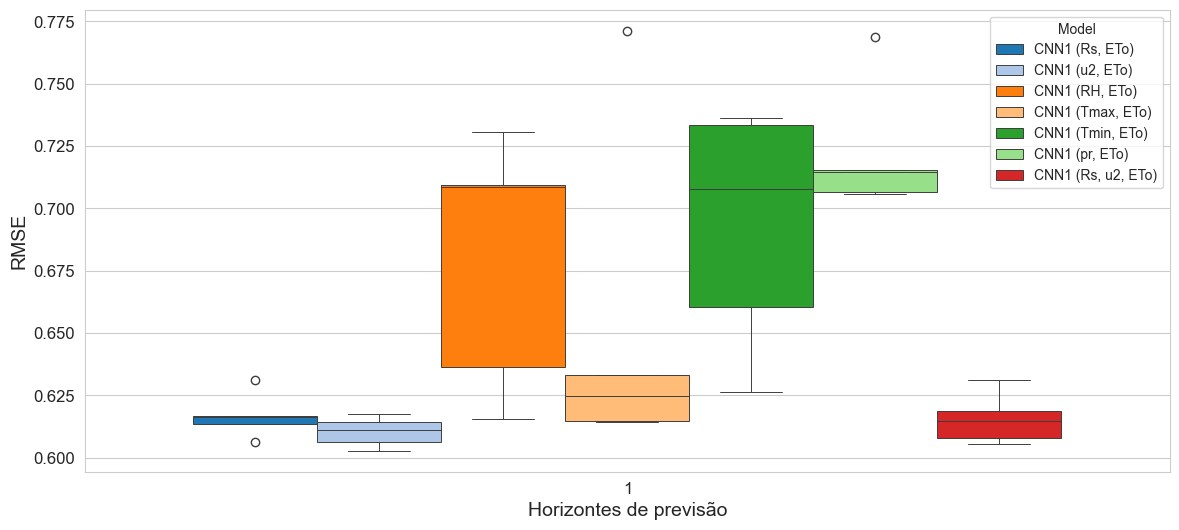

In [28]:
# u_CNN1 = pd.read_csv('u_results_CNN1',delimiter=',')
# u_CNN1 = u_CNN1[u_CNN1['Unnamed: 0'].isin([0,2,6,9])]

m_rs_CNN1 = pd.read_csv('m_rs_results_CNN1.csv',delimiter=',')
m_rs_CNN1 = m_rs_CNN1[m_rs_CNN1['Unnamed: 0'].isin([0,2,6,9])]

m_u2_CNN1 = pd.read_csv('m_u2_results_CNN1.csv',delimiter=',')
m_u2_CNN1 = m_u2_CNN1[m_u2_CNN1['Unnamed: 0'].isin([0,2,6,9])]

m_rh_CNN1 = pd.read_csv('m_rh_results_CNN1.csv',delimiter=',')
m_rh_CNN1 = m_rh_CNN1[m_rh_CNN1['Unnamed: 0'].isin([0,2,6,9])]

m_tmax_CNN1 = pd.read_csv('m_tmax_results_CNN1.csv',delimiter=',')
m_tmax_CNN1 = m_tmax_CNN1[m_tmax_CNN1['Unnamed: 0'].isin([0,2,6,9])]

m_tmin_CNN1 = pd.read_csv('m_tmin_results_CNN1.csv',delimiter=',')
m_tmin_CNN1 = m_tmin_CNN1[m_tmin_CNN1['Unnamed: 0'].isin([0,2,6,9])]

m_pr_CNN1 = pd.read_csv('m_pr_results_CNN1.csv',delimiter=',')
m_pr_CNN1 = m_pr_CNN1[m_pr_CNN1['Unnamed: 0'].isin([0,2,6,9])]

m_rs_u2_CNN1 = pd.read_csv('m_rs_u2_results_CNN1.csv',delimiter=',')
m_rs_u2_CNN1 = m_rs_u2_CNN1[m_rs_u2_CNN1['Unnamed: 0'].isin([0,2,6,9])]

# m_u2_tmax_CNN1 = pd.read_csv('m_u2_tmax_results_CNN1.csv',delimiter=',')
# m_u2_tmax_CNN1 = m_u2_tmax_CNN1[m_u2_tmax_CNN1['Unnamed: 0'].isin([0,2,6,9])]

frames = [m_rs_CNN1, m_u2_CNN1, m_rh_CNN1, m_tmax_CNN1, m_tmin_CNN1, m_pr_CNN1, m_rs_u2_CNN1]
result = pd.concat(frames, ignore_index=True)
result['Unnamed: 0'] = result['Unnamed: 0'] + 1

# plt.style.use('seaborn-paper')
sns.set_style("whitegrid")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[14,6], dpi=100)
g1 = sns.boxplot(x=result.iloc[:,0], y=result.iloc[:,1], hue=result.iloc[:,2], data=result, palette="tab20", linewidth=0.7, saturation=1)
plt.tick_params(labelsize=12)
# plt.xticks([1,3,7,10])
plt.xlabel("Horizontes de previsão", fontsize=14)
plt.ylabel("RMSE", fontsize=14)